In [1]:
!python --version

Python 3.10.16


In [2]:
!pip install opencv-python


In [3]:
import os 
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 


In [4]:
img = cv2.imread("train_images/0abf0c485f66.png", cv2.IMREAD_COLOR)

In [5]:
cv2.imshow('Image',img)
cv2.waitKey(0)

-1

In [6]:
height, width, channels = img.shape

print(f"Width: {width}, Height: {height}, Channels: {channels}")

Width: 2048, Height: 1536, Channels: 3


In [7]:
from dotenv import load_dotenv

load_dotenv()

TRAIN_IMAGE_PATH = os.getenv('TRAIN_IMAGES')
TEST_IMAGE_PATH = os.getenv('TEST_IMAGES')

In [8]:

all_files = os.listdir(TRAIN_IMAGE_PATH)


image_extensions = (".jpg", ".jpeg", ".png", ".bmp", ".tiff", ".gif")


train_image_count = 0
for file in all_files:
    if file.lower().endswith(image_extensions):
        train_image_count += 1
        
print("Train Image Count : ",train_image_count)


Train Image Count :  3662


In [9]:

all_files = os.listdir(TEST_IMAGE_PATH)


image_extensions = (".jpg", ".jpeg", ".png", ".bmp", ".tiff", ".gif")


test_image_count = 0
for file in all_files:
    if file.lower().endswith(image_extensions):
        test_image_count += 1
        
print("Test Image Count : ",test_image_count)


Test Image Count :  1928


In [10]:
image_type_count = {'JPG': 0, 'JPEG': 0, 'PNG': 0}

def count_images(directory):
    all_files = os.listdir(directory)
    for file in all_files:
        file_lower = file.lower()
        if file_lower.endswith('.jpg'):
            image_type_count['JPG'] += 1
        elif file_lower.endswith('.jpeg'):
            image_type_count['JPEG'] += 1
        elif file_lower.endswith('.png'):
            image_type_count['PNG'] += 1


count_images(TRAIN_IMAGE_PATH)
count_images(TEST_IMAGE_PATH)


print("Image Type Count:", image_type_count)


Image Type Count: {'JPG': 0, 'JPEG': 0, 'PNG': 5590}


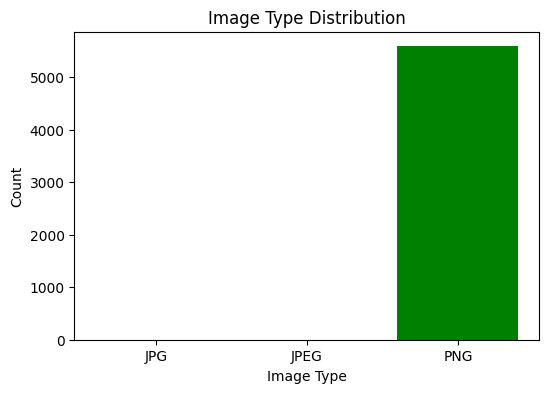

In [11]:
plt.figure(figsize=(6, 4))
plt.bar(image_type_count.keys(), image_type_count.values(), color=['blue', 'orange', 'green'])


plt.xlabel("Image Type")
plt.ylabel("Count")
plt.title("Image Type Distribution")
plt.show()

In [12]:
def calculate_width(image_directory):
    image_widths = {}
    image_files = [f for f in os.listdir(image_directory) if 
                   f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    
    for image_file in image_files:
        image_path = os.path.join(image_directory, image_file)
        img = cv2.imread(image_path)
        if img is not None:
            image_widths[image_file] = img.shape[1]  # Width of image

    return image_widths


train_widths = calculate_width(TRAIN_IMAGE_PATH)
test_widths = calculate_width(TEST_IMAGE_PATH)


all_widths = {**train_widths, **test_widths}
sorted_files = sorted(all_widths, key=all_widths.get)  
sorted_widths = [all_widths[file] for file in sorted_files]



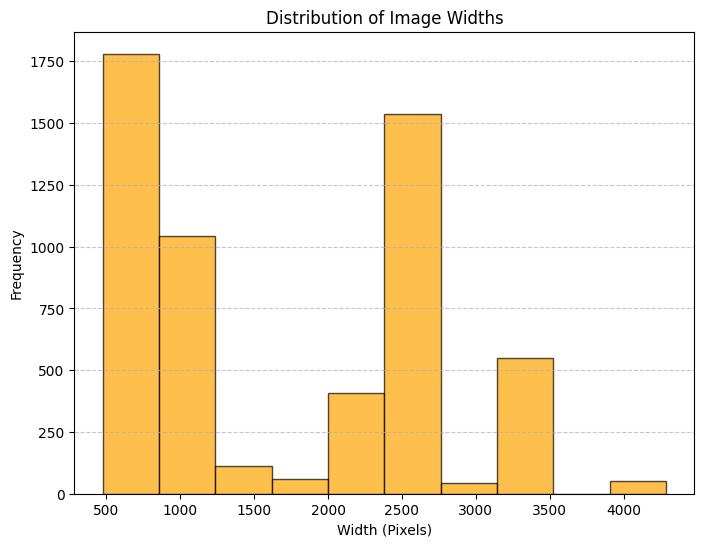

In [13]:
plt.figure(figsize=(8, 6))
plt.hist(sorted_widths, bins=10, color='orange', edgecolor='black', alpha=0.7)

plt.xlabel("Width (Pixels)")
plt.ylabel("Frequency")
plt.title("Distribution of Image Widths")
plt.grid(axis='y', linestyle="--", alpha=0.7)

plt.show()


In [14]:
def calculate_height(image_directory):
    image_height = {}
    image_files = [f for f in os.listdir(image_directory) if 
                   f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    
    for image_file in image_files:
        image_path = os.path.join(image_directory, image_file)
        img = cv2.imread(image_path)
        if img is not None:
            image_height[image_file] = img.shape[0]  

    return image_height


train_heights = calculate_height(TRAIN_IMAGE_PATH)
test_heights = calculate_height(TEST_IMAGE_PATH)


all_heights = {**train_heights, **test_heights}
sorted_files = sorted(all_heights, key=all_heights.get)  
sorted_height = [all_heights[file] for file in sorted_files]



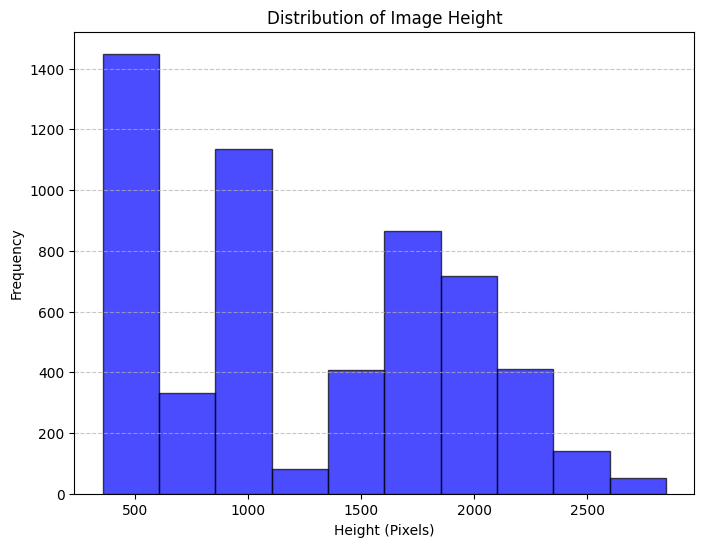

In [15]:
plt.figure(figsize=(8, 6))
plt.hist(sorted_height, bins=10, color='blue', edgecolor='black', alpha=0.7)

plt.xlabel("Height (Pixels)")
plt.ylabel("Frequency")
plt.title("Distribution of Image Height")
plt.grid(axis='y', linestyle="--", alpha=0.7)

plt.show()


In [17]:
def count_channel_intensity(image_directory):
    total_red, total_green, total_blue = 0, 0, 0
    image_count = 0
    image_files = [f for f in os.listdir(image_directory) if 
                   f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    
    for image_file in image_files:
        image_path = os.path.join(image_directory, image_file)
        img = cv2.imread(image_path)
        
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            
            total_red += np.sum(img[:, :, 0])  
            total_green += np.sum(img[:, :, 1])  
            total_blue += np.sum(img[:, :, 2])  
            
            image_count += 1

    return total_red, total_green, total_blue, image_count



total_red_train, total_green_train, total_blue_train, image_count_train = count_channel_intensity(TRAIN_IMAGE_PATH)
total_red_test, total_green_test, total_blue_test, image_count_test = count_channel_intensity(TEST_IMAGE_PATH)


total_red = total_red_train + total_red_test
total_green = total_green_train + total_green_test
total_blue = total_blue_train + total_blue_test
image_count = image_count_train + image_count_test




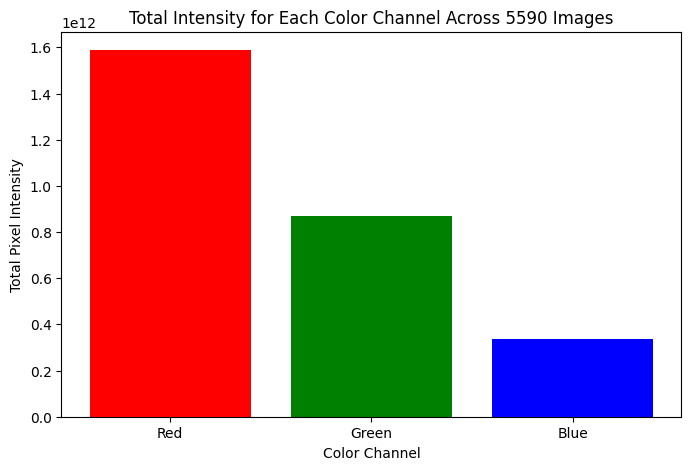

In [18]:
colors = ["red", "green", "blue"]
totals = [total_red, total_green, total_blue]

plt.figure(figsize=(8, 5))
plt.bar(["Red", "Green", "Blue"], totals, color=colors)
plt.xlabel("Color Channel")
plt.ylabel("Total Pixel Intensity")
plt.title(f"Total Intensity for Each Color Channel Across {image_count} Images")
plt.show()


In [19]:
TRAIN_CSV_PATH = os.getenv('TRAIN_CSV')
TEST_CSV_PATH = os.getenv('TEST_CSV')

In [20]:
train_df  = pd.read_csv(TRAIN_CSV_PATH)

In [21]:
train_df.shape

(3662, 2)

In [22]:
train_df.size

7324

In [23]:
train_df.head()

,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0


In [24]:
train_df.tail()

,id_code,diagnosis
3657,ffa47f6a7bf4,2
3658,ffc04fed30e6,0
3659,ffcf7b45f213,2
3660,ffd97f8cd5aa,0
3661,ffec9a18a3ce,2


In [25]:
train_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id_code,3662,3662,000c1434d8d7,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
diagnosis,3662.0,NaN,NaN,NaN,1.12698,1.298409,0.0,0.0,1.0,2.0,4.0


In [26]:
train_df.ndim

2

In [27]:
train_df['diagnosis'].nunique()

5

In [28]:
train_df['diagnosis'].unique()

array([2, 4, 1, 0, 3], dtype=int64)

In [29]:
class_count = train_df['diagnosis'].value_counts().to_dict()


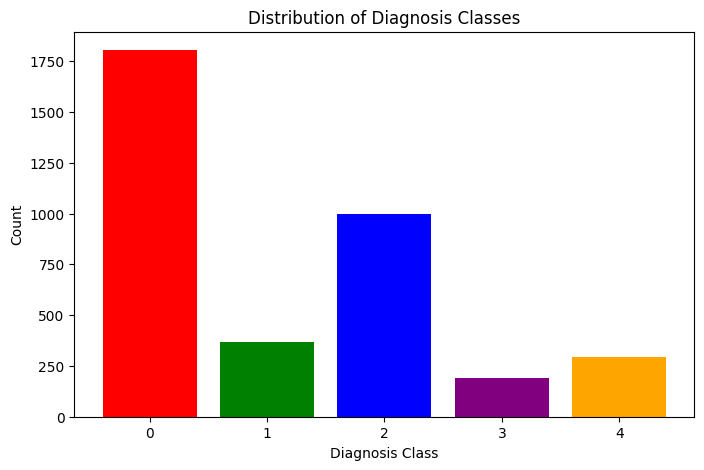

In [30]:
labels = list(class_count.keys())
counts = list(class_count.values())

plt.figure(figsize=(8, 5))
plt.bar(labels, counts, color=['red', 'blue', 'green', 'orange', 'purple'])


plt.xlabel("Diagnosis Class")
plt.ylabel("Count")
plt.title("Distribution of Diagnosis Classes")
plt.xticks(labels)  


plt.show()

In [ ]:
import tensorflow as tf
import os
import pandas as pd
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# ✅ Enable Mixed Precision for Speed
tf.keras.mixed_precision.set_global_policy("mixed_float16")

# ✅ Enable Multi-GPU Training
strategy = tf.distribute.MirroredStrategy()

# ✅ Correct Paths
IMAGE_DIR = "C:/Users/HP/OneDrive/Desktop/Projects/Retinopathy/PreProcessedImages/Train"
CSV_FILE = "C:/Users/HP/OneDrive/Desktop/Projects/Retinopathy/train.csv"
IMG_SIZE = (256, 256)
BATCH_SIZE = 64
AUTOTUNE = tf.data.AUTOTUNE  # Auto-optimizes data pipeline

# ✅ Load CSV and Preprocess Labels
df = pd.read_csv(CSV_FILE)
df["image_id"] = df["image_id"] + ".jpg"
df["label"] = df["label"].astype(str)  # Convert labels to string

# ✅ Define Dataset Loader
def load_image(image_name, label):
    img_path = tf.strings.join([IMAGE_DIR, "/", image_name])
    img = tf.io.read_file(img_path)
    img = tf.image.decode_jpeg(img, channels=3)  # Replace SciPy
    img = tf.image.resize(img, IMG_SIZE) / 255.0  # Normalize
    return img, label

# ✅ Create `tf.data.Dataset`
image_paths = df["image_id"].values
labels = df["label"].values

# Convert labels to integer indices
label_mapping = {label: idx for idx, label in enumerate(sorted(set(labels)))}
df["label_idx"] = df["label"].map(label_mapping)

dataset = tf.data.Dataset.from_tensor_slices((image_paths, df["label_idx"]))
dataset = dataset.map(load_image, num_parallel_calls=AUTOTUNE)  # Efficient parallel loading
dataset = dataset.shuffle(len(df)).batch(BATCH_SIZE).prefetch(AUTOTUNE)

# ✅ Split into Train & Validation
train_size = int(0.8 * len(df))
train_ds = dataset.take(train_size)
val_ds = dataset.skip(train_size)

# ✅ Model Definition (Inside `strategy.scope()`)

# ✅ Callbacks
early_stopping = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=3, min_lr=1e-6)
checkpoint = ModelCheckpoint("best_model.h5", monitor="val_accuracy", save_best_only=True, mode="max", verbose=1)

# ✅ Train Model WITHOUT `ImageDataGenerator`
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=50,
    callbacks=[early_stopping, reduce_lr, checkpoint],
    verbose=1
)


In [ ]:
import tensorflow as tf
import os
import pandas as pd
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint


tf.keras.mixed_precision.set_global_policy("mixed_float16")
strategy = tf.distribute.OneDeviceStrategy(device="/GPU:0")


IMAGE_DIR = PREPROCESSED_TRAINING_PATH
CSV_FILE = TRAIN_CSV_PATH
IMG_SIZE = (256, 256)
BATCH_SIZE = 16
AUTOTUNE = tf.data.AUTOTUNE  


train_df = pd.read_csv(CSV_FILE)
train_df["id_code"] = train_df["id_code"] + ".png"
train_df["diagnosis"] = train_df["diagnosis"].astype(str)  


train_df.head()


def load_image(image_path, label):

    image = tf.io.read_file(image_path)
    image = tf.image.decode_png(image, channels=3)
    image = tf.image.resize(image, [256, 256])
    image = tf.cast(image, tf.float32) / 255.0  # Normalize to [0, 1]
    

    return image, label



image_paths = [IMAGE_DIR + '\\' + code.rstrip(".png") + ".png" for code in train_df["id_code"].values]
labels = train_df["diagnosis"].values



labels = train_df["diagnosis"].astype("int32").values
raw_dataset = tf.data.Dataset.from_tensor_slices((image_paths, labels))


raw_dataset = raw_dataset.map(load_image, num_parallel_calls=tf.data.AUTOTUNE)
raw_dataset = raw_dataset.shuffle(len(train_df), seed=42)



# Step 2: Split before batching
train_size = int(0.8 * len(train_df))
train_ds = raw_dataset.take(train_size)
val_ds = raw_dataset.skip(train_size)

# Step 3: Apply batching and prefetch
train_ds = train_ds.batch(BATCH_SIZE).prefetch(AUTOTUNE)
val_ds = val_ds.batch(BATCH_SIZE).prefetch(AUTOTUNE)

from tensorflow.keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=2, min_lr=1e-6, verbose=1)



with strategy.scope():
    base_model = ResNet50(weights="imagenet", include_top=False, input_shape=(256, 256, 3))
    base_model.trainable = False
    for layer in base_model.layers[:-45]:
        layer.trainable = True

    x = GlobalAveragePooling2D()(base_model.output)  
    x = BatchNormalization()(x)  
    
    x = Dense(512, activation="relu", kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4))(x)
    x = Dropout(0.5)(x)  
    
    x = Dense(256, activation="relu")(x)  
    x = Dropout(0.3)(x)  
    
    output_layer = Dense(num_classes, activation="softmax")(x)  

    model = Model(inputs=base_model.input, outputs=output_layer)
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3,clipvalue=1.0)

    model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])



from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy('mixed_float16')


early_stopping = EarlyStopping(monitor="accuracy", patience=7, restore_best_weights=True)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="loss", factor=0.5, patience=2)
checkpoint = tf.keras.callbacks.ModelCheckpoint("best_model.h5", save_best_only=True, monitor="accuracy")


callbacks = [early_stopping, checkpoint, reduce_lr]



history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=30,
    callbacks=callbacks,
    verbose=1
)


In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np


In [3]:
model = tf.keras.models.load_model('C:\\Users\\HP\\OneDrive\\Desktop\\Projects\\Retinopathy\\best_model.h5')

: 